In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# 读取4张表的数据
prior = pd.read_csv("./data/instacart/order_products__prior.csv")

In [3]:
products = pd.read_csv("./data/instacart/products.csv")

In [4]:
orders = pd.read_csv("./data/instacart/orders.csv")

In [15]:
aisles = pd.read_csv("./data/instacart/aisles.csv")

In [6]:
# 合并四张表到一张表 （用户-物品类别）
_mg = pd.merge(prior,products,on=['product_id','product_id'])
_mg = pd.merge(_mg,orders,on=['order_id','order_id'])

In [7]:
mt = pd.merge(_mg,aisles,on=['aisle_id','aisle_id'])
mt.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,58707,prior,21,6,9,8.0,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,166654,prior,48,0,12,9.0,eggs
5,537,33120,2,1,Organic Egg Whites,86,16,180135,prior,15,2,8,3.0,eggs
6,582,33120,7,1,Organic Egg Whites,86,16,193223,prior,6,2,19,10.0,eggs
7,608,33120,5,1,Organic Egg Whites,86,16,91030,prior,11,3,21,12.0,eggs
8,623,33120,1,1,Organic Egg Whites,86,16,37804,prior,63,3,12,3.0,eggs
9,689,33120,4,1,Organic Egg Whites,86,16,108932,prior,16,1,13,3.0,eggs


In [16]:
# 交叉表（特殊的分组工具）
cross = pd.crosstab(mt['user_id'],mt['aisle'])

In [17]:
# 进行主成分分析
pca = PCA(n_components=0.9)

In [11]:
data.shape

(206209, 27)

In [27]:
data = pca.fit_transform(cross)

In [20]:
orders.info

<bound method DataFrame.info of          order_id  user_id eval_set  order_number  order_dow  \
0         2539329        1    prior             1          2   
1         2398795        1    prior             2          3   
2          473747        1    prior             3          3   
3         2254736        1    prior             4          4   
4          431534        1    prior             5          4   
5         3367565        1    prior             6          2   
6          550135        1    prior             7          1   
7         3108588        1    prior             8          1   
8         2295261        1    prior             9          1   
9         2550362        1    prior            10          4   
10        1187899        1    train            11          4   
11        2168274        2    prior             1          2   
12        1501582        2    prior             2          5   
13        1901567        2    prior             3          1   
14      

### 学习K-means

In [28]:
# 减少样本数量
x = data[:500]
x.shape

(500, 27)

In [30]:
# 假设用户一共分为4个类别
km = KMeans(n_clusters=4)

In [31]:
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [37]:
predict = km.predict(x)

In [35]:
# 显示聚类结果
plt.figure(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

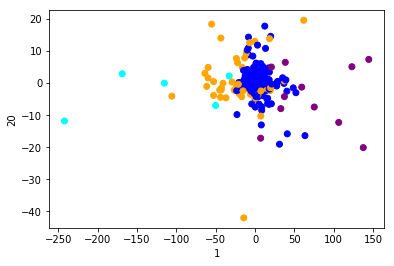

In [42]:
# 建立4个颜色的列表
colored = ['orange','cyan','blue','purple']
clr = [colored[i] for i in predict]
plt.scatter(x[:,1],x[:,20],color=clr)
plt.xlabel("1")
plt.ylabel("20")
plt.show()

In [45]:
# 评判聚类效果，轮廓系数，取值范围(-1,1)，越接近1，聚类效果越好
silhouette_score(x,predict)

0.6050816198993004